This is a tutorial for Python 2.7

# pyphysio library

## 1. Signals and Algorithms

Signal and Algorithm are the two main classes in pyphysio.


### 1.1 Signals in pyphysio

Description of how signals are represented in pyphysio

A signal is an ordered vector of timestamp-value pairs, where the timestamp is the instant at which the measured phenomenon had that value.
In pyphysio a signal is represented by the class **Signal** which extends the numpy.ndarray class.

In this part we will see the different types of signals that can be defined and their properties.

In [1]:
# import libraries
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# import the Signal classes
from pyphysio import EvenlySignal, UnevenlySignal

#### 1.1.1 EvenlySignal

When the signal is sampled with a fixed sampling frequency it is sufficient to know the timestamp at which the acquisition started and the sampling frequency to reconstruct the timestamp of each sample. This type of signal is represented by the class **EvenlySignal**.

Therefore to create an instance of **EvenlySignal** these are the input attributes needed:
* ``values`` : (unidimensional numpy array) values of the signal;
* ``sampling_freq`` : (float>0) sampling frequency;
* ``start_time`` : (float) temporal reference of the start of the signal. This is optional, if omitted it will set to 0;
* ``signal_nature`` : (string) identifier of the type of the signal. In future releases of pyphysio it will be used to check the appropriateness of the algorithms applied to the signal. Now it is optional and if omitted it will set to ''.

Class functions are provided to facilitate the management and processing of signals:
* `get_...()` type functions can be used to check signal attributes;
* `plot()` will plot the signal using matplotlib;
* `segment_time(t_start, t_stop)` and `segment_idx(idx_start, idx_stop)` can be used to extract a portion of the signal;
* `resample(fout)` can be used to change the sampling frequency.

In [3]:
# create a signal

## create fake data
np.random.seed(4)
signal_values = np.random.uniform(0, 1, size = 1000)

## set the sampling frequency
fsamp = 100 # Hz

## set the starting time
tstart = 100 # s

## create the Evenly signal
s_fake = EvenlySignal(values = signal_values, sampling_freq = fsamp, signal_nature = 'fake', start_time = tstart)

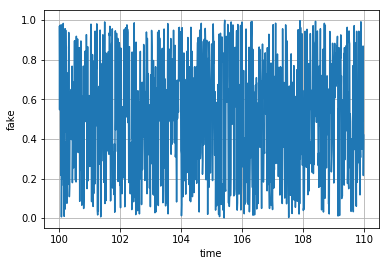

In [4]:
## plot
s_fake.plot()

In [5]:
# chech signal properties
print('Sampling frequency: {}'.format( s_fake.get_sampling_freq() ))
print('Start time:         {}'.format( s_fake.get_start_time() ))
print('End time:           {}'.format( s_fake.get_end_time() ))
print('Duration:           {}'.format( s_fake.get_duration() ))
print('Signal nature:      {}'.format( s_fake.get_signal_nature() ))
print('First ten instants: {}'.format( s_fake.get_times()[0:10] ))

Sampling frequency: 100
Start time:         100
End time:           110.0
Duration:           10.0
Signal nature:      fake
First ten instants: [ 100.    100.01  100.02  100.03  100.04  100.05  100.06  100.07  100.08
  100.09]


In [6]:
# check Signal representation
s_fake

<signal: fake, start_time: 100 freq:100Hz>
array([  9.67029839e-01,   5.47232249e-01,   9.72684360e-01,
         7.14815994e-01,   6.97728825e-01,   2.16089496e-01,
         9.76274455e-01,   6.23025520e-03,   2.52982362e-01,
         4.34791532e-01,   7.79382922e-01,   1.97685075e-01,
         8.62993236e-01,   9.83400677e-01,   1.63842241e-01,
         5.97333944e-01,   8.98609767e-03,   3.86571283e-01,
         4.41600579e-02,   9.56652968e-01,   4.36146647e-01,
         9.48977307e-01,   7.86305986e-01,   8.66289299e-01,
         1.73165421e-01,   7.49485870e-02,   6.00742721e-01,
         1.67972184e-01,   7.33380168e-01,   4.08443860e-01,
         5.27908823e-01,   9.37571584e-01,   5.21696122e-01,
         1.08193383e-01,   1.58223407e-01,   5.45202652e-01,
         5.24404080e-01,   6.37610244e-01,   4.01495444e-01,
         6.49805109e-01,   3.96900003e-01,   6.23916114e-01,
         7.67404967e-01,   1.78973910e-01,   3.75575769e-01,
         5.02533059e-01,   6.86667080e-01,

In [7]:
# import data from included examples
from pyphysio import TestData

ecg_data = TestData.ecg()

eda_data = TestData.eda()

In [8]:
# create two signals
fsamp = 2048
tstart_ecg = 15
tstart_eda = 5
ecg = EvenlySignal(values = ecg_data, sampling_freq = fsamp, signal_nature = 'ecg', start_time = tstart_ecg)
eda = EvenlySignal(values = eda_data, sampling_freq = fsamp, signal_nature = 'eda', start_time = tstart_eda)

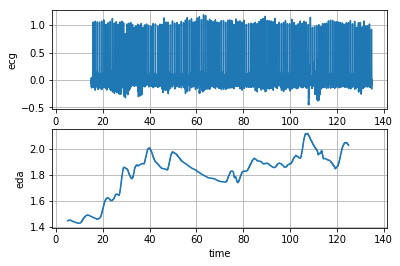

In [9]:
# plot
ax1 = plt.subplot(211)
ecg.plot()
plt.subplot(212, sharex=ax1)
eda.plot()

In [10]:
# check signal properties
print('ECG')
print('Sampling frequency: {}'.format( ecg.get_sampling_freq() ))
print('Start time:         {}'.format( ecg.get_start_time() ))
print('End time:           {}'.format( ecg.get_end_time() ))
print('Duration:           {}'.format( ecg.get_duration() ))
print('Signal nature:      {}'.format( ecg.get_signal_nature() ))
print('First ten instants: {}'.format( ecg.get_times()[0:10] ))
print('')
print('EDA')
print('Sampling frequency: {}'.format( eda.get_sampling_freq() ))
print('Start time:         {}'.format( eda.get_start_time() ))
print('End time:           {}'.format( eda.get_end_time() ))
print('Duration:           {}'.format( eda.get_duration() ))
print('Signal nature:      {}'.format( eda.get_signal_nature() ))
print('First ten instants: {}'.format( eda.get_times()[0:10] ))

ECG
Sampling frequency: 2048
Start time:         15
End time:           135.0
Duration:           120.0
Signal nature:      ecg
First ten instants: [ 15.          15.00048828  15.00097656  15.00146484  15.00195312
  15.00244141  15.00292969  15.00341797  15.00390625  15.00439453]

EDA
Sampling frequency: 2048
Start time:         5
End time:           125.0
Duration:           120.0
Signal nature:      eda
First ten instants: [ 5.          5.00048828  5.00097656  5.00146484  5.00195312  5.00244141
  5.00292969  5.00341797  5.00390625  5.00439453]


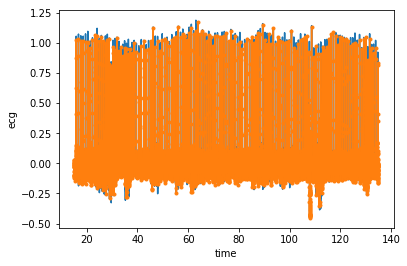

In [11]:
# resampling
ecg_128 = ecg.resample(fout=128)

ecg.plot()
ecg_128.plot('.-')

#### 1.1.2 UnevenlySignal

Other types of signals, for instance triggers indicating occurrences of heartbeats or events, are series of samples which are not equally temporally spaced. Thus the sampling frequency is not fixed and it is necessary to store the timestamp of each sample. This type of signals is represented by the class **UnevenlySignal**.

Therefore to create an instance of **UnevenlySignal** these are these additional input attributes are needed:
* ``x_values`` : (unidimensional numpy array) information about the temporal position of each sample. Should be of the same size of ``values``;
* ``x_type`` : ('instants' or 'indices') indicate what type of x_values have been used.

Two ways are allowed to define an **UnevenlySignal**:
1. by defining the indexes (`x_type='indices'`): x_values are indices of an array and the instants are automatically computed using the information from the `sampling_frequency` and the `start_time`. 
2. by defining the instants (`x_type='instants'`): x_values are instants and the indices are automatically computed using the information from the `sampling_frequency` and the `start_time`. 

As a general rule, the `start_time` is always associated to the index 0.

An additional class function is provided to transform an **UnevenlySignal** to an **EvenlySignal**:
* `to_evenly()` create an `EvenlySignal` by interpolating the signal with given signal sampling frequency.

In [12]:
# create a signal

## create fake data
signal_values = np.arange(100)

## create fake indices
idx = np.arange(100)
idx[-1] = 125

## set the sampling frequency
fsamp = 10 # Hz

## set the starting time
tstart = 10 # s

## create an Unevenly signal defining the indices
x_values_idx = idx

s_fake_idx = UnevenlySignal(values = signal_values, sampling_freq = fsamp, signal_nature = 'fake', start_time = tstart,
                       x_values = x_values_idx, x_type = 'indices')

In [13]:
## create an Unevenly signal defining the indices
x_values_time = idx/fsamp + 10

## set the starting time
tstart = 0

s_fake_time = UnevenlySignal(values = signal_values, sampling_freq = fsamp, signal_nature = 'fake', start_time = tstart,
                       x_values = x_values_time, x_type = 'instants')

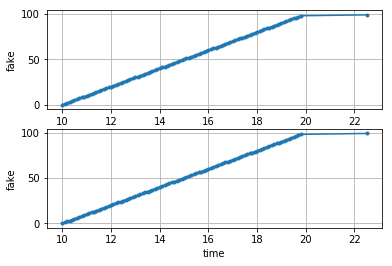

In [14]:
#plot
ax1=plt.subplot(211)
s_fake_idx.plot('.-')
plt.subplot(212, sharex=ax1)
s_fake_time.plot('.-')

In [15]:
# note that the times are the same but not the starting_time nor the indices:

# check samples instants
print('Instants:')
print(s_fake_idx.get_times())
print(s_fake_time.get_times())

# check samples indices
print('Indices:')
print(s_fake_idx.get_indices())
print(s_fake_time.get_indices())

# check start_time
print('Start time:')
print(s_fake_idx.get_start_time())
print(s_fake_time.get_start_time())

Instants:
[ 10.   10.1  10.2  10.3  10.4  10.5  10.6  10.7  10.8  10.9  11.   11.1
  11.2  11.3  11.4  11.5  11.6  11.7  11.8  11.9  12.   12.1  12.2  12.3
  12.4  12.5  12.6  12.7  12.8  12.9  13.   13.1  13.2  13.3  13.4  13.5
  13.6  13.7  13.8  13.9  14.   14.1  14.2  14.3  14.4  14.5  14.6  14.7
  14.8  14.9  15.   15.1  15.2  15.3  15.4  15.5  15.6  15.7  15.8  15.9
  16.   16.1  16.2  16.3  16.4  16.5  16.6  16.7  16.8  16.9  17.   17.1
  17.2  17.3  17.4  17.5  17.6  17.7  17.8  17.9  18.   18.1  18.2  18.3
  18.4  18.5  18.6  18.7  18.8  18.9  19.   19.1  19.2  19.3  19.4  19.5
  19.6  19.7  19.8  22.5]
[ 10.   10.1  10.2  10.3  10.4  10.5  10.6  10.7  10.8  10.9  11.   11.1
  11.2  11.3  11.4  11.5  11.6  11.7  11.8  11.9  12.   12.1  12.2  12.3
  12.4  12.5  12.6  12.7  12.8  12.9  13.   13.1  13.2  13.3  13.4  13.5
  13.6  13.7  13.8  13.9  14.   14.1  14.2  14.3  14.4  14.5  14.6  14.7
  14.8  14.9  15.   15.1  15.2  15.3  15.4  15.5  15.6  15.7  15.8  15.9
  16.   16.1  1

In [16]:
# chech signal properties
print('Defined by Indices')
print('Sampling frequency: {}'.format( s_fake_idx.get_sampling_freq() ))
print('Start time:         {}'.format( s_fake_idx.get_start_time() ))
print('End time:           {}'.format( s_fake_idx.get_end_time() ))
print('Duration:           {}'.format( s_fake_idx.get_duration() ))
print('Signal nature:      {}'.format( s_fake_idx.get_signal_nature() ))
print('First ten instants: {}'.format( s_fake_idx.get_times()[0:10] ))
print('')
print('Defined by Instants')
print('Sampling frequency: {}'.format( s_fake_time.get_sampling_freq() ))
print('Start time:         {}'.format( s_fake_time.get_start_time() ))
print('End time:           {}'.format( s_fake_time.get_end_time() ))
print('Duration:           {}'.format( s_fake_time.get_duration() ))
print('Signal nature:      {}'.format( s_fake_time.get_signal_nature() ))
print('First ten instants: {}'.format( s_fake_time.get_times()[0:10] ))

Defined by Indices
Sampling frequency: 10
Start time:         10
End time:           22.6
Duration:           12.6
Signal nature:      fake
First ten instants: [ 10.   10.1  10.2  10.3  10.4  10.5  10.6  10.7  10.8  10.9]

Defined by Instants
Sampling frequency: 10
Start time:         0
End time:           22.6
Duration:           22.6
Signal nature:      fake
First ten instants: [ 10.   10.1  10.2  10.3  10.4  10.5  10.6  10.7  10.8  10.9]


In [17]:
# to_evenly
s_fake_time_evenly = s_fake_time.to_evenly(kind = 'linear')

<class 'pyphysio.Signal.EvenlySignal'>
<class 'pyphysio.Signal.UnevenlySignal'>


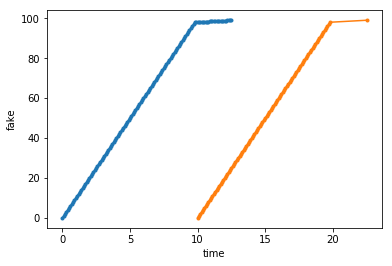

In [18]:
s_fake_time_evenly.plot('.-')
s_fake_time.plot('.-')

# check type
print(type(s_fake_time_evenly))
print(type(s_fake_time))

#### 1.1.3 Segmentation of signals

Two general class functions are provided to segment a signal:
1. `segment_time(t_start, t_stop)` is used to extract a portion of the signal between the instants `t_start` and
`t_stop`;
2. `segment_idx(idx_start, idx_stop)` is used to extract a portion of the signal between the indices `idx_start` and `idx_stop`.

The output signal will inherit **`sampling_freq`** and **`signal_nature`** but the **`start_time`** will be set to **`t_start`** or to the instant corresponding to **`idx_start`** accordingly to the method used.

In [19]:
# segmentation of ES
ecg_segment = ecg.segment_time(45, 54)
eda_segment = eda.segment_time(45, 54)

45.0


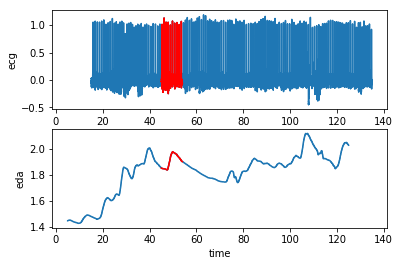

In [20]:
# plot
ax1 = plt.subplot(211)
ecg.plot()
ecg_segment.plot('r')

plt.subplot(212, sharex=ax1)
eda.plot()
eda_segment.plot('r')

print(ecg_segment.get_start_time())

In [21]:
# segmentation of US

s_fake_idx_segment = s_fake_idx.segment_time(10.5, 18)
s_fake_time_segment = s_fake_time.segment_time(10.5, 18)

10.5


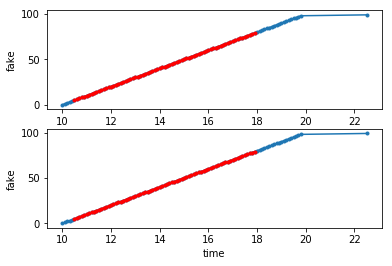

In [22]:
# plot
ax1 = plt.subplot(211)
s_fake_idx.plot('.-')
s_fake_idx_segment.plot('.-r')

plt.subplot(212, sharex=ax1)
s_fake_time.plot('.-')
s_fake_time_segment.plot('.-r')

print(s_fake_time_segment.get_start_time())

### 1.2 Algorithms in pyphysio

A signal processing step is a computational function $F$ that operates on input data (a signal) to produce a result. It is characterized by a set of parameters **p** which regulate its behavior.

![algorithm](img/algorithm.png)

*Figure 1: Abstract representation of a processing step.*

1. In pyphysio each processing step is represented by an instance of a class derived from the generic class `Algorithm`.

2. The type of function or algorithm is given by the Class name (e.g. `BeatFromECG` extracts the heartbeats from an ECG signal, `PeakDetection` detects the peaks in the input signal).

3. The parameters of the function/algorithm are the attributes of the created instance.

Therefore, a processing step is defined by creating a new instance of the Class, which is initialized with the given parameters:
```
processing_step = ph.BeatFromECG(parameters)
```
To execute the processing step we need to give as input an instance of the class `Signal`:
```
output = processing_step(input)
```


Algorithms in pyphysio are grouped in four categories:

* Filters : deterministic algorithms that modify the values of the input signal without changing its nature;
* Estimators : algorithms that aim at extracting information from the input signal which is given in output as a signal with a different nature;
* Indicators : algorithms that operate on the signal to provide a scalar value (or metrics)
* Tools : algorithms that can be useful for the signal processing and return as output one or more numpy arrays or scalars.

#### 1.2.1 Filters

Filters return a signal which has the same **`signal_nature`** of the input signal. 

The name *`Filters`* recalls the aim of this algorithms which is in general to increase the Signal/Noise ratio by filtering out the unwanted components in a signal (e.g high frequency noise).

In [23]:
# create a Filter
import pyphysio.filters.Filters as flt

lowpass_50 = flt.IIRFilter(fp=50, fs=75, ftype='ellip')

In [24]:
# help inline
#?flt.IIRFilter

In [25]:
# check parameters
print(lowpass_50)
# OR
print(lowpass_50.get_params())

IIRFilter{'fp': 50, 'loss': 0.1, 'att': 40, 'ftype': 'ellip', 'fs': 75}
{'fp': 50, 'loss': 0.1, 'att': 40, 'ftype': 'ellip', 'fs': 75}


In [26]:
# apply a Filter
ecg_filtered = lowpass_50(ecg)

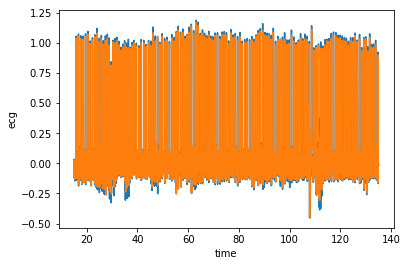

In [27]:
#plot
ecg.plot()
ecg_filtered.plot()

In [28]:
# check output type
ecg.get_signal_nature()

'ecg'

#### 1.2.2 Estimators
Estimators are algorithms which aim at extracting the information of interest from the input signal, thus returning a new signal which has a different **`signal_nature`**. 

The name *`Estimators`* recalls the fact that the information extraction depends on the value of the algorithm parameters which might not be known *a-priori*. Thus the result should be considered as an estimate of the real content of information of the input signal.

In [29]:
# create an Estimator
import pyphysio.estimators.Estimators as est

ibi_ecg = est.BeatFromECG()

In [30]:
# check parameters
ibi_ecg

BeatFromECG{'k': 0.7, 'delta': 0, 'bpm_max': 120}

In [31]:
# apply an Estimator
ibi = ibi_ecg(ecg_filtered)

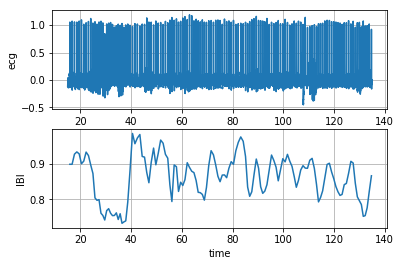

In [32]:
# plot
ax1 = plt.subplot(211)
ecg.plot()

plt.subplot(212, sharex=ax1)
ibi.plot()

In [33]:
# check output type
ibi.get_signal_nature()

'IBI'

#### 1.2.3 Indicators

Indicators are algorithm which extract a metrics (scalar value) from the input signal, for instance a statistic (average).

Three types of indicators are provided in **`pyphysio`**:
* Time domain indicators: comprising simple statistical indicators and other metrics that can be computed on the signal values;
* Frequency domain indicators: metrics that are computed on the Power Spectrum Density (PSD) of the signal;
* Non-linear indicators: complex indicators that are computed on the signal values (e.g. Entropy).

In [34]:
# create an Indicator
import pyphysio.indicators.TimeDomain as td_ind
import pyphysio.indicators.FrequencyDomain as fd_ind

In [35]:
rmssd = td_ind.RMSSD()
HF = fd_ind.PowerInBand(interp_freq=4, freq_max=0.4, freq_min=0.15, method = 'ar')

In [36]:
# check parameters
print(rmssd)
print(HF)

RMSSD{}
PowerInBand{'freq_min': 0.15, 'interp_freq': 4, 'method': 'ar', 'freq_max': 0.4}


In [37]:
# apply an Indicator
rmssd_ = rmssd(ibi)
HF_ = HF(ibi)

print(rmssd_)
print(HF_)

0.0326922861035
107.717960009


In [38]:
# check output type
print(type(rmssd_))
print(type(HF_))

<type 'numpy.float64'>
<type 'numpy.float64'>


#### 1.2.4 Tools

This is a collection of useful algorithms that can be used for signal processing. 

These algorithms might return scalar values or numpy arrays.

In [39]:
# create a Tool
import pyphysio.tools.Tools as tll

compute_psd = tll.PSD(method='ar', interp_freq = 4)

In [40]:
# check parameters
compute_psd

PSD{'normalize': True, 'interp_freq': 4, 'min_order': 18, 'window': 'hamming', 'nfft': 2048, 'remove_mean': True, 'method': 'ar', 'max_order': 25}

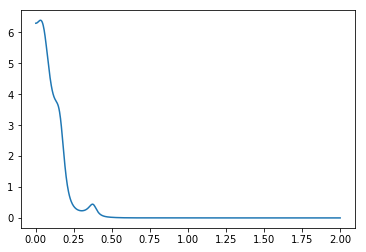

In [41]:
# apply a Tool
frequencies, power = compute_psd(ibi)

plt.plot(frequencies, power)
plt.show()